In [2]:
import earthaccess
import xarray as xr
import fsspec

/home/jovyan/.conda/envs/sea-ice-oscillations/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import trollimage

In [5]:
earthaccess.login()

EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
No .netrc found in /home/jovyan


Enter your Earthdata Login username:  myranda.uselton
Enter your Earthdata password:  ········


You're now authenticated with NASA Earthdata Login
Using token with expiration date: 10/08/2023
Using user provided credentials for EDL


In [6]:
# search for images by location and date
results = earthaccess.search_data(
    short_name="VNP29", 
    cloud_hosted=True, 
    bounding_box=(-130.0, 73.0, -160.0, 77.0),
    temporal=("2022-10-07", "2022-10-10"),
    count=6
)
# get the list of files
files = earthaccess.open(results)

Granules found: 168
 Opening 6 granules, approx size: 1.44 GB


QUEUEING TASKS | : 6it [00:00, 1837.19it/s]
PROCESSING TASKS | : 100%|██████████| 6/6 [00:00<00:00, 10.07it/s]
COLLECTING RESULTS | : 100%|██████████| 6/6 [00:00<00:00, 72108.38it/s]


In [7]:
# open the first file in the dataset, show some info about it 
ds = xr.open_dataset(files[0])
print(ds.IceCover)

1.0%


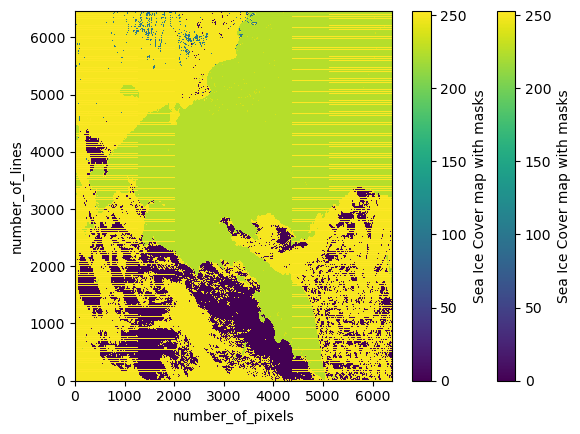

In [8]:
# plot the sea ice cover
ds = xr.open_dataset(files[0])
ds
# every other file seems to be of type OPS and contains an image, the others are of type SCI
if ds.AlgorithmType == "OPS":
    ds1 = xr.open_dataset(files[0], group="SeaIceCover_Data")
    print(ds1["SeaIceCover_Map"].plot())
    ds1["SeaIceCover_Map"].plot()

In [11]:
from trollimage import xrimage

In [12]:
img = xrimage.XRImage(ds1["SeaIceCover_Map"])

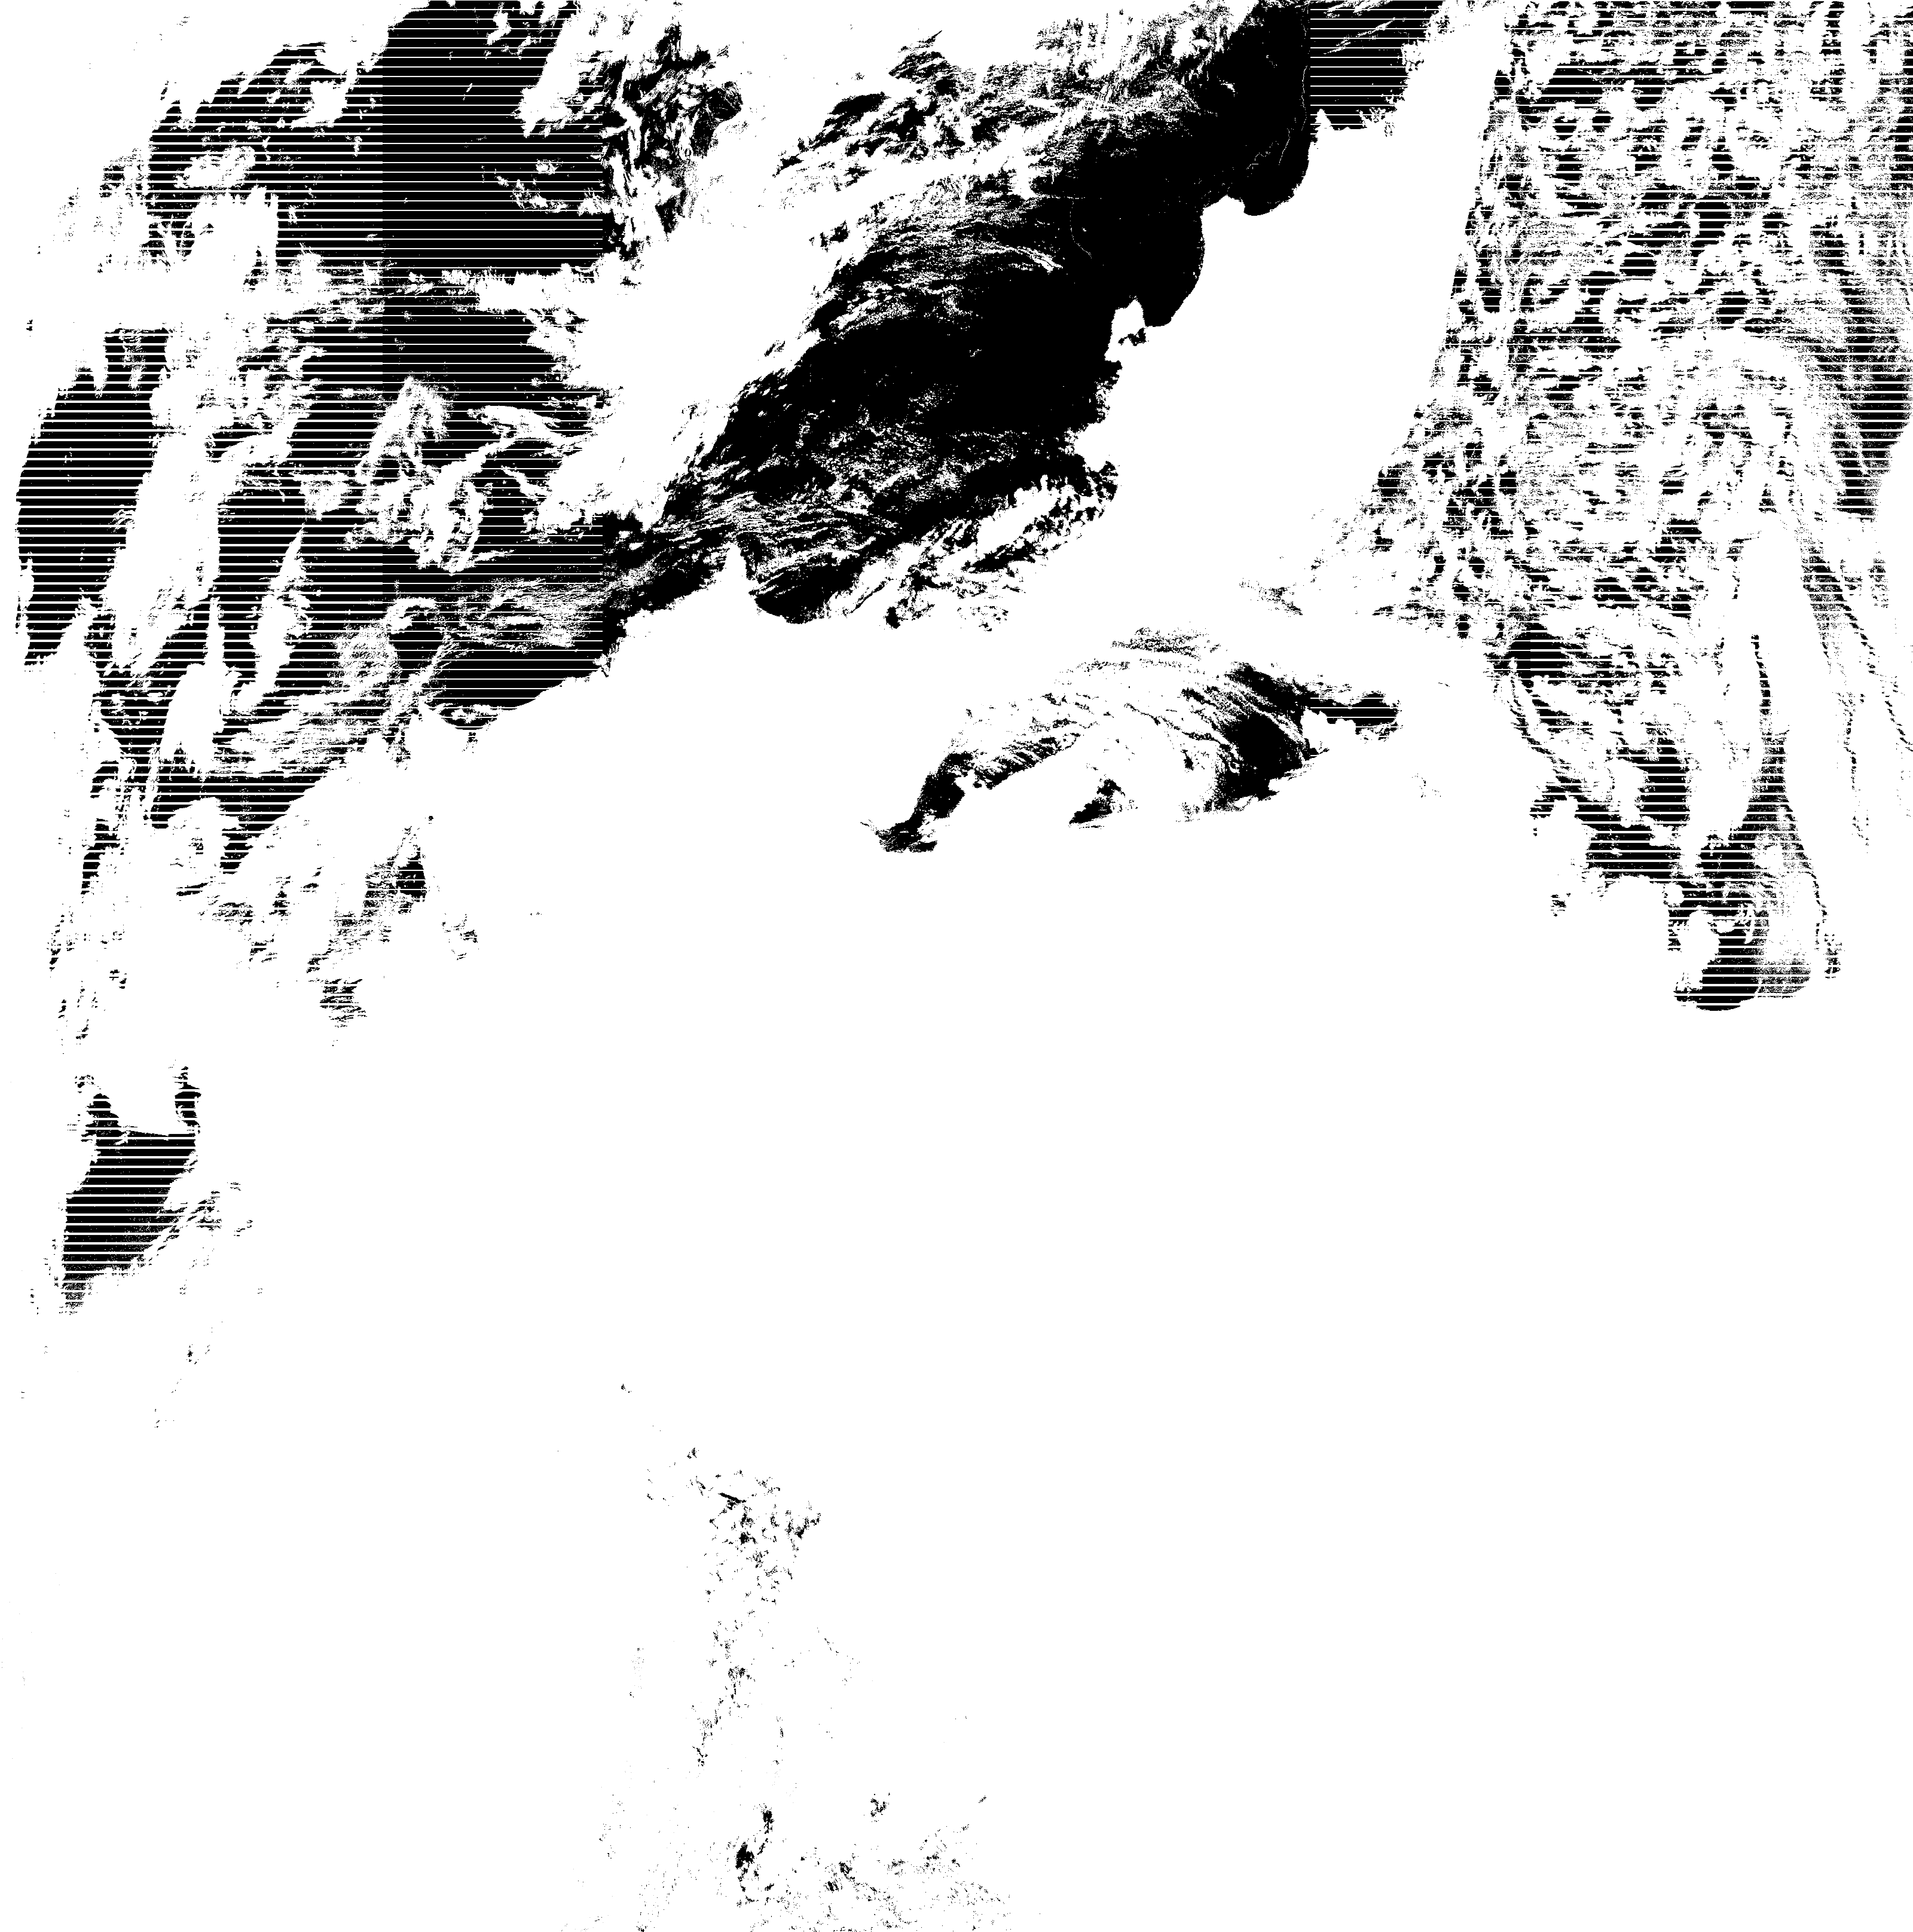

In [13]:
img.show()

In [14]:
img.save("example_sea_ice.png")